In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dill

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/montreal-bike-counters/comptagevelo2017.csv
/kaggle/input/montreal-bike-counters/comptage_velo_2022.csv
/kaggle/input/montreal-bike-counters/comptage_velo_2018.csv
/kaggle/input/montreal-bike-counters/comptage_velo_2021.csv
/kaggle/input/montreal-bike-counters/localisation_des_compteurs_velo.csv
/kaggle/input/montreal-bike-counters/comptage_velo_2020.csv
/kaggle/input/montreal-bike-counters/comptage_velo_2023.csv
/kaggle/input/montreal-bike-counters/comptage_velo_2019.csv


## Explore the dataset

Load and inspect dataset downloaded from the [City of Montreal's Open Data Portal for bikepath counters](https://donnees.montreal.ca/ville-de-montreal/velos-comptage).

- 2023: Only for January. Table in "long" format, whereas in "wide" format for previous years.
- 2017 and 2018: Counters have actual location names, and data is summarised by day
- 2019-2022: Counters use identifiers "compteur_#####". Table in wide format. Consistent
- 2021: Missing the month of July

In [2]:
# Import datasets and inspect their structure
# df_counters holds a list of all available bike counters

df_counters = pd.read_csv("/kaggle/input/montreal-bike-counters/localisation_des_compteurs_velo.csv")
df_2017     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptagevelo2017.csv")
df_2018     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptage_velo_2018.csv")
df_2019     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptage_velo_2019.csv")
df_2020     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptage_velo_2020.csv")
df_2021     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptage_velo_2021.csv")
df_2022     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptage_velo_2022.csv")
df_2023     = pd.read_csv("/kaggle/input/montreal-bike-counters/comptage_velo_2023.csv")

df_2019

# print(df_2017.head())
# print(df_2018.head())
# print(df_2019.head())
# print(df_2020.head())
# print(df_2021.head())
# print(df_2022.head())
# print(df_2023.head())

,Date,compteur_100054073,compteur_100052606,compteur_100003032,compteur_100053057,compteur_100053058,compteur_100012218,compteur_100035408,compteur_100004575,compteur_100035409,...,compteur_100011747,compteur_39,compteur_100025474,compteur_100017523,compteur_100053055,compteur_100053210,compteur_100017441,compteur_100053059,compteur_100047030,compteur_100057052
0,2019-01-01 00:00:00,NaN,NaN,0,NaN,NaN,0,0.0,0,0,...,0,0.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019-01-01 00:15:00,NaN,NaN,2,NaN,NaN,0,0.0,0,0,...,0,1.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019-01-01 00:30:00,NaN,NaN,1,NaN,NaN,0,0.0,0,0,...,0,0.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019-01-01 00:45:00,NaN,NaN,4,NaN,NaN,0,1.0,0,0,...,0,0.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019-01-01 01:00:00,NaN,NaN,0,NaN,NaN,0,0.0,0,0,...,0,6.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,2019-12-31 22:45:00,0.0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0.0,1,0.0,0.0,0.0,0.0,0,NaN,NaN
38012,2019-12-31 23:00:00,0.0,0.0,0,0.0,0.0,2,0.0,0,0,...,0,0.0,5,0.0,0.0,0.0,0.0,0,NaN,NaN
38013,2019-12-31 23:15:00,0.0,0.0,2,0.0,0.0,0,0.0,0,0,...,0,4.0,4,0.0,0.0,0.0,0.0,0,NaN,NaN
38014,2019-12-31 23:30:00,0.0,0.0,2,0.0,0.0,0,0.0,0,0,...,0,1.0,5,0.0,0.0,0.0,0.0,0,NaN,NaN


In [3]:
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)
print(df_2021.shape)
print(df_2022.shape)

# Shape of df_2023 is different from previous years

df_2023.head()

(365, 21)
(365, 25)
(38016, 47)
(35136, 55)
(35040, 56)
(34320, 56)


,date,id_compteur,nb_passages
0,2023-01-01 00:00:00,100054073,0.0
1,2023-01-01 00:00:00,300020478,0.0
2,2023-01-01 00:00:00,100003040,0.0
3,2023-01-01 00:00:00,100052606,0.0
4,2023-01-01 00:00:00,100003032,0.0


In [4]:
# df_2023 is in "long" format, and only contains data for January

print(df_2023[df_2023['id_compteur'] == 300014916].head())

# Prior to 2023, tables are in "wide" format.
# Between 2019 and 2022, colnames for counters are prefixed with 'compteur_'

print(df_2022['compteur_300014916'])

# For 2017 and 2018, counters (and colnames) are named after street intersections (!)

print(df_2017.columns)
print(df_2018.columns)

                    date  id_compteur  nb_passages
41   2023-01-01 00:00:00    300014916          0.0
102  2023-01-01 00:15:00    300014916          0.0
163  2023-01-01 00:30:00    300014916          0.0
224  2023-01-01 00:45:00    300014916          2.0
285  2023-01-01 01:00:00    300014916          0.0
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34315    0.0
34316    0.0
34317    0.0
34318    0.0
34319    0.0
Name: compteur_300014916, Length: 34320, dtype: float64
Index(['Date', 'Unnamed: 1', 'Berri1', 'Boyer', 'Boyer 2', 'Brébeuf',
       'Christophe-Colomb', 'CSC (Côte Sainte-Catherine)',
       'Eco-Totem - Métro Laurier', 'Maisonneuve_2', 'Maisonneuve_3',
       'Notre-Dame', 'Parc', 'PierDup', 'Pont Jacques-Cartier',
       'Rachel / Hôtel de Ville', 'Rachel / Papineau', 'René-Lévesque',
       'Saint-Antoine', 'Saint-Laurent/Bellechasse', 'Saint-Urbain'],
      dtype='object')
Index(['Date', 'Unnamed: 1', 'Berri1', 'Boyer', 'Boyer 2', 'Brébeuf'

## Analysis using data from counters common to all years

Bike counts throughout the city of Montreal have been collected for (pandemic) years 2020-2023. New counters have been added during that period, and the reports from these instruments will not be included in the analysis (consider only data from counters older than 2020, inclusively).

### Year 2023

We only have the full dataset for the monh of January 2023. And unlike the tables from previous years, which are in "wide" format, the table for 2023 is in "long" format.

In [5]:
# Get a list of counters added after 2020 and remove from 2023 the counters matching this list

new_counters = df_counters[df_counters['Annee_implante']> 2019]['ID'].tolist()
df_2023_norm = df_2023[~df_2023.id_compteur.isin(new_counters)]
old_counters = df_2023_norm['id_compteur'].unique()
print(df_2023_norm)

# Total for January 2023

sum_2023_01 = df_2023_norm['nb_passages'].sum()
print(f"Nb. of counters added after 2019: {len(new_counters)}")
print(f"Nb. of remaining counters 2023  : {len(old_counters)}")
print(f"Nb. of counts for January 2023  : {sum_2023_01}")

                       date  id_compteur  nb_passages
0       2023-01-01 00:00:00    100054073          0.0
2       2023-01-01 00:00:00    100003040          0.0
3       2023-01-01 00:00:00    100052606          0.0
4       2023-01-01 00:00:00    100003032          0.0
5       2023-01-01 00:00:00    100053057          NaN
...                     ...          ...          ...
181517  2023-01-31 23:45:00    100057050          0.0
181518  2023-01-31 23:45:00    100057051          NaN
181519  2023-01-31 23:45:00    100057052          NaN
181520  2023-01-31 23:45:00    100057053          1.0
181521  2023-01-31 23:45:00    100057500          NaN

[133920 rows x 3 columns]
Nb. of counters added after 2019: 16
Nb. of remaining counters 2023  : 45
Nb. of counts for January 2023  : 137065.0


In [6]:
# Alternatively, we can list all counters present for each year and keep only 
# the ones that have data for all tables (counters common to all tables)

cols_2019 = pd.Series(df_2019.columns)
cols_2020 = pd.Series(df_2020.columns)
cols_2021 = pd.Series(df_2021.columns)
cols_2022 = pd.Series(df_2022.columns)

# For 2023, we need to list unique counters' IDs and prefix them with "compteur_"

cols_2023 = 'compteur_' + df_2023['id_compteur'].astype(str)
cols_2023 = cols_2023.unique()
print(f"Number of counters in table 'df_2023': {len(cols_2023)}")

Number of counters in table 'df_2023': 59


In [7]:
# Place lists in Python's set container then use the set intersection method, two-by-two
# dataframe from 2020-2022 contain a "Date" column, but not cols_2023, because we built
# that list from the actual IDs of the counters

cols_common = pd.Series(list(set(cols_2019).intersection(set(cols_2020))))
cols_common = pd.Series(list(set(cols_common).intersection(set(cols_2021))))
cols_common = pd.Series(list(set(cols_common).intersection(set(cols_2022))))
cols_common = pd.Series(list(set(cols_common).intersection(set(cols_2023))))

print(f"Head of {cols_common.head()}")
print(f"Nb. of counters: {len(cols_common)}")

Head of 0    compteur_100017523
1    compteur_100003041
2    compteur_100052601
3    compteur_100053058
4    compteur_100035408
dtype: object
Nb. of counters: 44


In [8]:
# Find common counters by merging lists as Pandas DataFrames

counters_2019 = pd.DataFrame({'counters': df_2019.columns})
counters_2020 = pd.DataFrame({'counters': df_2020.columns})
counters_2021 = pd.DataFrame({'counters': df_2021.columns})
counters_2022 = pd.DataFrame({'counters': df_2022.columns})
counters_2023 = pd.DataFrame({'counters': cols_2023})

counters_common = pd.merge(counters_2019, counters_2020)
counters_common = pd.merge(counters_common, counters_2021)
counters_common = pd.merge(counters_common, counters_2022)
counters_common = pd.merge(counters_common, counters_2023)

# Both lists "cols_common" and "counters_common" should be the same,
# and should be of the same length 

counters = pd.Series(list(set(cols_common).intersection(set(counters_common['counters']))))

if cols_common.tolist().sort() == counters_common['counters'].tolist().sort():
    print('Both lists are the same')
else:
    print('Both lists are NOT the same!')    

print(set(counters) == set(counters_common['counters'].tolist()))
print(set(counters) == set(cols_common.tolist()))

print(f"Nb. of counters common to both methods: {len(counters)}")
print(f"Nb. of counters by set intersection: {len(cols_common)}")
print(f"Nb. of counters by DataFrame merge : {len(counters_common)}")

# Previous analysis - Comparisons for 2020-2023 (excluding year 2019):
#
# Nb. of counters common to both methods: 54
# Nb. of counters by set intersection: 54
# Nb. of counters by DataFrame merge : 54

# By the method of substracting counters added after 2020, we should come to the same count

print(f"Nb. of counters by removing newer counters from 2023: {len(df_2023_norm['id_compteur'].unique())}")

# But there are fewer (52 instead of 54)! 
# Hmmm... Maybe 2 are inactive or do not have counts yet?
# When considering 2019, there are 44 counters in common to years 2019-2023

Both lists are the same
True
True
Nb. of counters common to both methods: 44
Nb. of counters by set intersection: 44
Nb. of counters by DataFrame merge : 44
Nb. of counters by removing newer counters from 2023: 45


In [9]:
# For filtering 2023, remove the prefix "compteur_"

ls_counters = counters.str.replace('compteur_', '').tolist()
df_2023_norm = df_2023[df_2023.id_compteur.astype(str).isin(ls_counters)]
print(df_2023_norm)

# Total for January 2023

sum_2023_01 = df_2023_norm['nb_passages'].sum()
df_sum_2023 = pd.DataFrame({'Year' : ['2023'], 
                            'Month': [1],
                            'Sum'  : [sum_2023_01]})
df_sum_2023

# Count is much higher when using counters common to years 2020-2023, 
# then when removing new counters from 2023 (above):
# 235,626 cysclist passages for 54 counters _vs_ 183,123 for 52 counters

                       date  id_compteur  nb_passages
0       2023-01-01 00:00:00    100054073          0.0
2       2023-01-01 00:00:00    100003040          0.0
3       2023-01-01 00:00:00    100052606          0.0
4       2023-01-01 00:00:00    100003032          0.0
5       2023-01-01 00:00:00    100053057          NaN
...                     ...          ...          ...
181517  2023-01-31 23:45:00    100057050          0.0
181518  2023-01-31 23:45:00    100057051          NaN
181519  2023-01-31 23:45:00    100057052          NaN
181520  2023-01-31 23:45:00    100057053          1.0
181521  2023-01-31 23:45:00    100057500          NaN

[130944 rows x 3 columns]


,Year,Month,Sum
0,2023,1,135825.0


## Years 2019-2022

In [10]:
# NOTE: The following code raises KeyErrors. For some reason, some counters are
# not found in certain years. Use the list of 44 common "counters" from cells above.

# To compare with 2020, remove counters that have been added after that year
# We first generate a list of counters names, with prefix that corresponds to
# colnames of tables from previous years

print(df_counters[df_counters['Annee_implante'] > 2019])
new_counters = df_counters[df_counters['Annee_implante'] > 2019]['ID']
new_counters = "compteur_" + new_counters.astype(str)
new_counters = new_counters.str.strip().tolist()
print(new_counters)

# df_2022.drop(new_counters, axis=1)
# KeyError: "['compteur_300021685' 'compteur_300022314' 'compteur_300020679'\n 'compteur_300020679' 'compteur_300020816' 'compteur_300028650'] not found in axis"
# Remove the offending Keys manually (note: counter 300020679 has duplicate entries)

#new_counters = ['compteur_300014916', 'compteur_300014994', 'compteur_300020478']
#df_2022 = df_2022.drop(columns=new_counters)
#df_2022.head()

           ID  Ancien_ID                                   Nom Statut  \
37  100055268        NaN                       Rachel / Pie IX  Actif   
47  100054241        NaN                      McGill / William  Actif   
49  300014916        NaN               REV Bellechasse / 13ème  Actif   
50  300014994        NaN               REV Berri/Sauvé dir sud  Actif   
51  300014993        NaN         REV Lajeunesse/Sauvé dir nord  Actif   
52  300014986        NaN       REV St-Denis/Carrières dir nord  Actif   
53  300014985        NaN        REV St-Denis/Carrières dir sud  Actif   
54  300014995        NaN          REV St-Denis/Duluth dir nord  Actif   
55  300014996        NaN           REV St-Denis/Rachel dir sud  Actif   
56  300020478        NaN  Eco-Display - Maisonneuve and Greene  Actif   
57  300021685        NaN                             A25/Gouin  Actif   
58  300022314        NaN                 REV 4 Peel/Notre Dame  Actif   
59  300020679        NaN  REV Bellechasse/Av Christ

In [11]:
def filter_counters(df, counters):
    # From df, keep only the columns 'compteur_' that match the IDs in "counters"
    # Add 'Date' to the list of columns that we will subset. And then subset.

    cols_to_keep = counters.tolist()
    cols_to_keep.insert(0, 'Date')

    df = df[cols_to_keep]

    # Re-shape to a "long" format

    #df_2022_long = df_2022_counts.melt(ignore_index=False).reset_index()
    df = df.reset_index()
    df_long = pd.melt(df, id_vars='Date', value_vars=counters.tolist())

    # Date column contains space-separated Date and Time information, 'yyyy-mm-dd hh:mm:ss'
    # Split this column so that we can filter on Date (to get months) => Not necessary

    # df_long[['Date', 'Time']] = df_long['Date'].str.split(' ', n=1, expand=True) 
    df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')
    return(df_long)

In [12]:
# For each year, keep only the columns 'compteur_' that match the IDs in "counters"
# Split Date-Time column, return a "long" format for sweparating into months

df_2019_counts = filter_counters(df=df_2019, counters=counters)
df_2020_counts = filter_counters(df=df_2020, counters=counters)
df_2021_counts = filter_counters(df=df_2021, counters=counters) # See Note below
df_2022_counts = filter_counters(df=df_2022, counters=counters)

# There is a problem with df_2021 where an entry may not be in date-time format.
# Adding errors='coerce' in filter_counters() fixed the problem, but we don't know 
# what caused the error. TODO: investigate

In [13]:
def sum_by_month(df, year):
    """
    Select month one-by-one from "df", for "year".
    """
    lod = []
    for m in range(1,13):
        # Use the fact that 'Date' is numpy datetime dtype (datetime64[ns])
        # df_2022_01 = df_2022_counts[(df_2022_counts['Date'] >= '2022-01-01') & (df_2022_counts['Date'] < '2022-02-01')]

        dfm = df[df['Date'].dt.month == m]
        s = dfm['value'].sum()
        lod.append({'Year': year, 'Month': m, 'Sum': s})
        
    return(pd.DataFrame(lod))

In [14]:
df_sum_2019 = sum_by_month(df_2020_counts, 2019)
df_sum_2020 = sum_by_month(df_2020_counts, 2020)
df_sum_2021 = sum_by_month(df_2021_counts, 2021)
df_sum_2022 = sum_by_month(df_2022_counts, 2022)


In [15]:
df = pd.concat([df_sum_2019, df_sum_2020, df_sum_2021, df_sum_2022, df_sum_2023], axis=0)
df

# WARNING: July 2021 has no data. See below.

,Year,Month,Sum
0,2019,1,173849.0
1,2019,2,160788.0
2,2019,3,290671.0
3,2019,4,690261.0
4,2019,5,1611964.0
5,2019,6,1961497.0
6,2019,7,2092364.0
7,2019,8,1924851.0
8,2019,9,1702479.0
9,2019,10,1102255.0


### Visualize the summarized data

<AxesSubplot:>

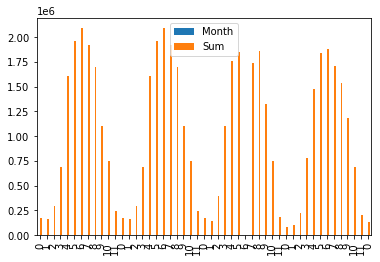

In [16]:
df.plot.bar()

Hmm, looks like there are less passages recorded in 2021-2022, which contradicts the trends reported here and there of increasing cyclists
Maybe they are using new routes, upon which new counters have been placed? Let's try the same analysis, without removing the data from newer counters. See below.

<AxesSubplot:xlabel='Month'>

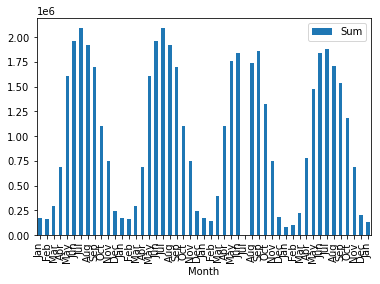

In [17]:
df0 = df
df0 = df0.reset_index(drop=True)
df0['Sum'] = df0['Sum'].astype(int)
df0.loc[df0['Month'] == 1,  'Month'] = 'Jan'
df0.loc[df0['Month'] == 2,  'Month'] = 'Feb'
df0.loc[df0['Month'] == 3,  'Month'] = 'Mar'
df0.loc[df0['Month'] == 4,  'Month'] = 'Apr'
df0.loc[df0['Month'] == 5,  'Month'] = 'May'
df0.loc[df0['Month'] == 6,  'Month'] = 'Jun'
df0.loc[df0['Month'] == 7,  'Month'] = 'Jul'
df0.loc[df0['Month'] == 8,  'Month'] = 'Aug'
df0.loc[df0['Month'] == 9,  'Month'] = 'Sep'
df0.loc[df0['Month'] == 10, 'Month'] = 'Oct'
df0.loc[df0['Month'] == 11, 'Month'] = 'Nov'
df0.loc[df0['Month'] == 12, 'Month'] = 'Dec'

df0.plot.bar(x='Month', y='Sum')

In [18]:
fig = px.bar(df0, x='Month', y='Sum', color='Year',barmode='group',
             title="Bike Counts per Month, 2019-2023",
             template='ggplot2')
fig.add_annotation(text="Vamanos a la playa!", x="Jul", y=1500000, arrowhead=1, showarrow=True)
fig.show()

In [19]:
fig1 = px.bar(df0, x=df0.index, y='Sum', title="Foo", template='ggplot2')
fig1.update_xaxes(title_text='Months', tickvals=df0.index, ticktext=df0['Month'].tolist())
fig1.show()

In [20]:
fig2 = px.box(df0, x="Month", y="Sum", 
              points="all", 
              color="Month", 
              title="Bike Counts per Month, 2019-2023",
              template='ggplot2')
fig2.show()

In [21]:
# Remove the outlier July 2021, which is skewing the statistics

df1 = df0
print(df1[(df1['Year'] == 2021) & (df1['Month'] == 'Jul')])
df1 = df1.drop(df1[(df1['Year'] == 2021) & (df1['Month'] == 'Jul')].index)

fig2b = px.box(df1, x="Month", y="Sum", 
              points="all", 
              color="Month", 
              title="Bike Counts per Month, 2019-2023",
              template='ggplot2')
fig2b.update_layout(showlegend=False)
fig2b.show()

    Year Month  Sum
30  2021   Jul    0


   Year  Season     Count
0  2019  winter   2302941
1  2019  summer  10395410
2  2020  winter   2302941
3  2020  summer  10395410
4  2021  winter   2738323
5  2021  summer   8532168
6  2022  winter   2077896
7  2022  summer   9617647


<AxesSubplot:xlabel='Season'>

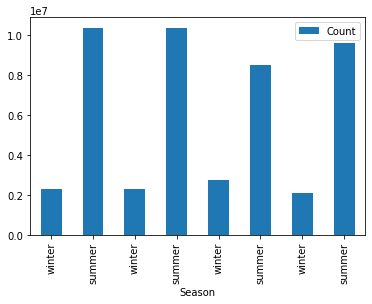

In [22]:
# df_winter = df[df['Month'].isin([11, 12, 1, 2, 3, 4])]
# df_summer = df[df['Month'].isin([5, 6, 7, 8, 9, 10])]
# Use dataset that does not include July 2021

df_winter = df1[df1['Month'].isin(['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])]
df_summer = df1[df1['Month'].isin(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])]

df_seasons = pd.DataFrame({'Year'  : [2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022],
                          'Season': ['winter', 'summer', 'winter', 'summer', 'winter', 'summer', 'winter', 'summer'],
                          'Count' : [df_winter[df_winter['Year'] == 2019]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2019]['Sum'].sum(),
                                     df_winter[df_winter['Year'] == 2020]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2020]['Sum'].sum(),
                                     df_winter[df_winter['Year'] == 2021]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2021]['Sum'].sum(),
                                     df_winter[df_winter['Year'] == 2022]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2022]['Sum'].sum()
                                    ]})
print(df_seasons)
df_seasons.plot.bar(x='Season', y='Count')

In [23]:
winter_median = df_seasons[df_seasons['Season']=='winter']['Count'].median()
winter_mean   = df_seasons[df_seasons['Season']=='winter']['Count'].mean()
winter_std    = df_seasons[df_seasons['Season']=='winter']['Count'].std()

summer_median = df_seasons[df_seasons['Season']=='summer']['Count'].median()
summer_mean   = df_seasons[df_seasons['Season']=='summer']['Count'].mean()
summer_std    = df_seasons[df_seasons['Season']=='summer']['Count'].std()

df_seasons_stats = pd.DataFrame([{'Season': 'winter', 'median': winter_median, 'mean': winter_mean, 'std': winter_std},
                                 {'Season': 'summer', 'median': summer_median, 'mean': summer_mean, 'std': summer_std}])
df_seasons_stats

,Season,median,mean,std
0,winter,2302941.0,2355525.25,276370.719962
1,summer,10006528.5,9735158.75,881827.492999


In [24]:
fig3 = px.box(df_seasons, x="Season", y="Count", points="all", 
              color="Season",
              width=500,height=400,
              title="Bike Counts in winter vs. summer for 2019-2023", 
              template='ggplot2')
fig3.show()

In [25]:
# Difference between winter and summer

#print(f"Number of recorded passages during winter (November to April, inclusively) represent {int((2302941.0 / 10006528.5) * 100)}% of the counts in summer months (May-Oct).")
perc = ( df_seasons_stats['median'][0] / df_seasons_stats['median'][1] ) * 100
print(f"Number of recorded passages during winter (November to April, inclusively) represent {int(perc)}% of the counts in summer months (May-Oct).")


Number of recorded passages during winter (November to April, inclusively) represent 23% of the counts in summer months (May-Oct).


## Use data from all counters

When using data from all counters, the downward trend 

In [26]:
def reshape(df):
    """
    List columns to re-shape and convert "wide" to "long" format
    """
    cols = df.columns.tolist()
    cols.remove('Date')
    
    df = df.reset_index()
    df_long = pd.melt(df, id_vars='Date', value_vars=cols)

    df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')
    return(df_long)

In [27]:
# Re-shape counters tables from wide to long

df_counts_2019 = reshape(df_2019)
df_counts_2020 = reshape(df_2020)
df_counts_2021 = reshape(df_2021)
df_counts_2022 = reshape(df_2022)

# Summarize counts for each month, for every year

df_all_2019 = sum_by_month(df_counts_2019, 2019)
df_all_2020 = sum_by_month(df_counts_2020, 2020)
df_all_2021 = sum_by_month(df_counts_2021, 2021)
df_all_2022 = sum_by_month(df_counts_2022, 2022)

# 2023 is already in long format, and only contains data for January

sum_2023_01 = df_2023['nb_passages'].sum()
df_all_2023 = pd.DataFrame({'Year' : ['2023'], 
                            'Month': [1],
                            'Sum'  : [sum_2023_01]})

# Concatenate sum of counts for every year together

df = pd.concat([df_all_2019, df_all_2020, df_all_2021, df_all_2022, df_all_2023], axis=0)
df_seasons_stats['median']


0     2302941.0
1    10006528.5
Name: median, dtype: float64

    Year Month      Sum
0   2019   Jan    88742
1   2019   Feb    72796
2   2019   Mar   143218
3   2019   Apr   540806
4   2019   May  1319120
5   2019   Jun  1522826
6   2019   Jul  3672772
7   2019   Aug  1913359
8   2019   Sep  1744095
9   2019   Oct  1179053
10  2019   Nov   352056
11  2019   Dec   181793
12  2020   Jan   173849
13  2020   Feb   160788
14  2020   Mar   290671
15  2020   Apr   690261
16  2020   May  1755533
17  2020   Jun  2149366
18  2020   Jul  2286727
19  2020   Aug  2122088
20  2020   Sep  1888615
21  2020   Oct  1290074
22  2020   Nov   862921
23  2020   Dec   321022
24  2021   Jan   348781
25  2021   Feb   273003
26  2021   Mar   550049
27  2021   Apr  1345426
28  2021   May  2171176
29  2021   Jun  2301885
30  2021   Jul        0
31  2021   Aug  2184853
32  2021   Sep  2380168
33  2021   Oct  1724660
34  2021   Nov   961100
35  2021   Dec   241125
36  2022   Jan   108152
37  2022   Feb   137624
38  2022   Mar   308642
39  2022   Apr  1021489
40  2022   May  

<AxesSubplot:xlabel='Month'>

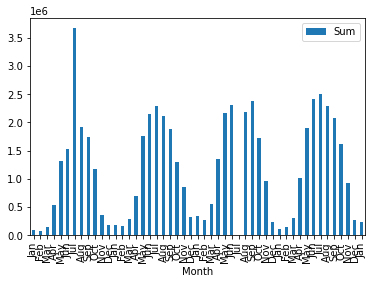

In [28]:
# Convert counts to int and replace Month labels

df0 = df
df0 = df0.reset_index(drop=True)
df0['Sum'] = df0['Sum'].astype(int)
df0.loc[df0['Month'] == 1,  'Month'] = 'Jan'
df0.loc[df0['Month'] == 2,  'Month'] = 'Feb'
df0.loc[df0['Month'] == 3,  'Month'] = 'Mar'
df0.loc[df0['Month'] == 4,  'Month'] = 'Apr'
df0.loc[df0['Month'] == 5,  'Month'] = 'May'
df0.loc[df0['Month'] == 6,  'Month'] = 'Jun'
df0.loc[df0['Month'] == 7,  'Month'] = 'Jul'
df0.loc[df0['Month'] == 8,  'Month'] = 'Aug'
df0.loc[df0['Month'] == 9,  'Month'] = 'Sep'
df0.loc[df0['Month'] == 10, 'Month'] = 'Oct'
df0.loc[df0['Month'] == 11, 'Month'] = 'Nov'
df0.loc[df0['Month'] == 12, 'Month'] = 'Dec'
print(df0)
df0.plot.bar(x='Month', y='Sum')

When using data from all counters, the decrease in the number of passages in later years is not observed. Acttually, we see the opposite.

### July 2019 outlier

July 2019 is an outlier, with about twice as many passages counted. Is this caused by a single counter, which has been removed? This outlier is not found when taking counts only for counters common to 2019-2023.

Further investigation (see Supplementary analyses) indicates that "compteur_39" has over 45% more counts than the second highest counter. It may have gone trigger-happy, but this counter is not amongst the counters that are common to all years from 2019 to 2023.

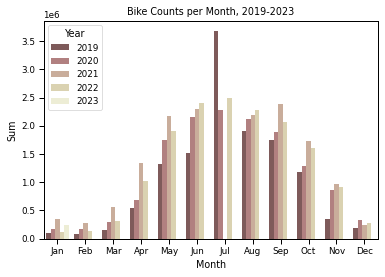

In [30]:
sns.set_context('paper')
sns.barplot(x='Month', y='Sum', hue='Year', data=df0, palette='pink')
plt.title('Bike Counts per Month, 2019-2023')
plt.show()

Text(0, 0.5, 'nb_passages')

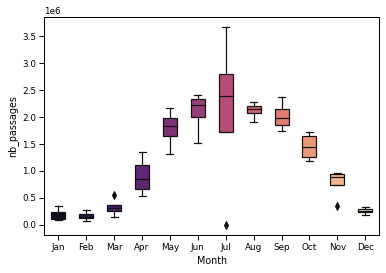

In [31]:
sns.set_context('paper')
sns.boxplot(x="Month", y="Sum", data=df0, width=0.5, palette='magma')
#plt.title('Bike Counts in winter vs. summer for 2019-2023')
plt.ylabel("nb_passages")

In [32]:
fig = px.bar(df0, x='Month', y='Sum', color='Year',barmode='group',
             title="Bike Counts per Month, 2019-2023",
             template='ggplot2')
fig.add_annotation(text="Vamanos a la playa!", x="Jul", y=1500000, arrowhead=1, showarrow=True)
fig.show()

In [33]:
fig1 = px.bar(df0, x=df0.index, y='Sum', title="Foo", template='ggplot2')
fig1.update_xaxes(title_text='Months', tickvals=df0.index, ticktext=df0['Month'].tolist())
fig1.show()

In [34]:
fig2 = px.box(df0, x="Month", y="Sum", 
              points="all", 
              color="Month", 
              title="Bike Counts per Month, 2019-2023",
              template='ggplot2')
fig2.show()

   Year  Season       Count
0  2019  winter   1379411.0
1  2019  summer  11351225.0
2  2020  winter   2499512.0
3  2020  summer  11492403.0
4  2021  winter   3719484.0
5  2021  summer  10762742.0
6  2022  winter   2771908.0
7  2022  summer  12782544.0


<AxesSubplot:xlabel='Season'>

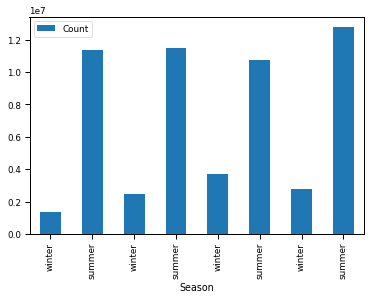

In [35]:
# df_winter = df0[df0['Month'].isin(['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])]
# df_summer = df0[df0['Month'].isin(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'oct'])]
df_winter = df[df['Month'].isin([11, 12, 1, 2, 3, 4])]
df_summer = df[df['Month'].isin([5, 6, 7, 8, 9, 10])]

df_seasons = pd.DataFrame({'Year'  : [2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022],
                          'Season': ['winter', 'summer', 'winter', 'summer', 'winter', 'summer', 'winter', 'summer'],
                          'Count' : [df_winter[df_winter['Year'] == 2019]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2019]['Sum'].sum(),
                                     df_winter[df_winter['Year'] == 2020]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2020]['Sum'].sum(),
                                     df_winter[df_winter['Year'] == 2021]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2021]['Sum'].sum(),
                                     df_winter[df_winter['Year'] == 2022]['Sum'].sum(),
                                     df_summer[df_summer['Year'] == 2022]['Sum'].sum()
                                    ]})
print(df_seasons)
df_seasons.plot.bar(x='Season', y='Count')

In [36]:
df_desc = pd.DataFrame({'winter': df_seasons[df_seasons['Season']=='winter']['Count'].describe(),
                        'summer': df_seasons[df_seasons['Season']=='summer']['Count'].describe()})
df_desc # But we don't get the median values with describe()

,winter,summer
count,4.000000e+00,4.000000e+00
mean,2.592579e+06,1.159723e+07
std,9.630701e+05,8.510477e+05
min,1.379411e+06,1.076274e+07
25%,2.219487e+06,1.120410e+07
50%,2.635710e+06,1.142181e+07
75%,3.008802e+06,1.181494e+07
max,3.719484e+06,1.278254e+07


In [37]:
# Nice to have the median

winter_median = df_seasons[df_seasons['Season']=='winter']['Count'].median()
winter_mean   = df_seasons[df_seasons['Season']=='winter']['Count'].mean()
winter_std    = df_seasons[df_seasons['Season']=='winter']['Count'].std()

summer_median = df_seasons[df_seasons['Season']=='summer']['Count'].median()
summer_mean   = df_seasons[df_seasons['Season']=='summer']['Count'].mean()
summer_std    = df_seasons[df_seasons['Season']=='summer']['Count'].std()

df_seasons_stats = pd.DataFrame([{'Season': 'winter', 'median': winter_median, 'mean': winter_mean, 'std': winter_std},
                                 {'Season': 'summer', 'median': summer_median, 'mean': summer_mean, 'std': summer_std}])
df_seasons_stats

,Season,median,mean,std
0,winter,2635710.0,2592578.75,963070.061830
1,summer,11421814.0,11597228.50,851047.719125


In [38]:
fig3 = px.box(df_seasons, x="Season", y="Count", points="all", 
              color="Season",
              width=500, height=400,
              title="Bike Counts in winter vs. summer for 2019-2023", 
              template='ggplot2')
fig3.show()

In [39]:
# Difference between winter and summer

perc = ( df_seasons_stats['median'][0] / df_seasons_stats['median'][1] ) * 100
print(f"Number of recorded passages during winter (November to April, inclusively) represent {int(perc)}% of the counts in summer months (May-Oct).")

Number of recorded passages during winter (November to April, inclusively) represent 23% of the counts in summer months (May-Oct).


## References

- https://donnees.montreal.ca/ville-de-montreal/velos-comptage

## Supplementary analyses

### July 2021

In [40]:
# Supplementary analyses
# July 2021 has no counts! What went wrong?

df_2021_07 = df_2021_counts[df_2021_counts['Date'].dt.month == 7]
print(df_2021_07)

# The problem is not in the filtering of counts

df_2021_07 = df_2021_counts[(df_2021_counts['Date'] >= '2021-07-01') & (df_2021_counts['Date'] < '2021-08-01')]
print(df_2021_07)

# In fact, there is no data for July 2021: `grep '2021-07' comptage_velo_2021.csv` yields no match
# There are data for June 30th and August 1st, but nothing for July

df_2021[(df_2021['Date'] >= '2021-06-30') & (df_2021['Date'] <= '2021-08-01')]

Empty DataFrame
Columns: [Date, variable, value]
Index: []
Empty DataFrame
Columns: [Date, variable, value]
Index: []


,Date,compteur_100054073,compteur_100003040,compteur_100052606,compteur_100003032,compteur_100053057,compteur_100053058,compteur_100012218,compteur_100035408,compteur_100004575,...,compteur_300014996,compteur_100011747,compteur_100025474,compteur_100017523,compteur_100053055,compteur_100053210,compteur_100017441,compteur_100053059,compteur_100047030,compteur_100057052
17280,2021-06-30 00:00:00,1.0,1.0,0.0,16.0,NaN,0.0,4.0,8.0,0.0,...,6.0,0.0,22.0,4.0,1.0,0.0,8.0,1.0,0.0,NaN
17281,2021-06-30 00:15:00,0.0,2.0,0.0,8.0,NaN,0.0,7.0,9.0,0.0,...,12.0,0.0,27.0,2.0,1.0,3.0,10.0,0.0,0.0,NaN
17282,2021-06-30 00:30:00,1.0,1.0,0.0,9.0,NaN,0.0,5.0,1.0,0.0,...,2.0,0.0,12.0,1.0,1.0,2.0,3.0,2.0,2.0,NaN
17283,2021-06-30 00:45:00,0.0,2.0,3.0,8.0,NaN,0.0,4.0,5.0,0.0,...,6.0,0.0,16.0,0.0,0.0,1.0,1.0,2.0,1.0,NaN
17284,2021-06-30 01:00:00,0.0,0.0,1.0,12.0,NaN,0.0,3.0,1.0,0.0,...,4.0,0.0,13.0,1.0,0.0,0.0,0.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,2021-06-30 22:45:00,1.0,0.0,2.0,13.0,NaN,0.0,13.0,4.0,0.0,...,11.0,0.0,36.0,4.0,3.0,2.0,5.0,0.0,3.0,NaN
17372,2021-06-30 23:00:00,4.0,0.0,1.0,28.0,NaN,0.0,17.0,25.0,0.0,...,17.0,0.0,32.0,3.0,1.0,2.0,12.0,4.0,1.0,NaN
17373,2021-06-30 23:15:00,1.0,3.0,2.0,24.0,NaN,0.0,19.0,13.0,0.0,...,22.0,0.0,46.0,8.0,3.0,3.0,8.0,2.0,3.0,NaN
17374,2021-06-30 23:30:00,0.0,2.0,4.0,29.0,NaN,0.0,11.0,20.0,0.0,...,25.0,0.0,37.0,3.0,1.0,1.0,10.0,0.0,0.0,NaN


In [42]:
# Looking for the outlier in July 2019

df_2019_outlier = df_2019
df_2019_outlier['Date'] = pd.to_datetime(df_2019_outlier['Date'])
df_2019_07 = df_2019_outlier[df_2019_outlier['Date'].dt.month == 7]

# Drop column 'Date' before summing up counts for each remaining column (counters)
df_2019_07 = df_2019_07.drop(columns=['Date'])
sums_2019_07 = df_2019_07.sum(axis=0)
sums_2019_07 = sums_2019_07.sort_values(ascending=False)
print(sums_2019_07.head())

df_sums = pd.DataFrame({'compteur': sums_2019_07.index, 'sum_07': sums_2019_07.values})
fig_2019_07 = px.box(df_sums, y="sum_07", width=400, points="all")
fig_2019_07.show()

# "compteur_39" seems to be the outlier
# Is this counter in the list of counters common to all years?

if 'compteur_39' in set(counters):
    print("'compteur_39' is in the list of common counters")
else:
    print("'compteur_39' is NOT in the list of common counters")


compteur_39           490390.0
compteur_100003039    337124.0
compteur_100007390    314724.0
compteur_100012218    234008.0
compteur_100053210    223594.0
dtype: float64


'compteur_39' is NOT in the list of common counters


In [41]:
dill.dump_session('velo-counter.dill.db')